In [166]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import choice
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [167]:
# 3.1

with open("data.pickle", "rb") as f:
    dataset = pickle.load(f)

x_test, y_test = dataset["test"][:, 0], dataset["test"][:, 1]

x_trains = [[] for _ in range(15)]
y_trains = [[] for _ in range(15)]

size = 7500//15
remaining = list(range(15))
for x, y in dataset["train"]:
    i = choice(remaining)
    x_trains[i].append(x)
    y_trains[i].append(y)
    if len(x_trains[i]) == size:
        remaining.remove(i)

x_trains = np.array([np.array(x) for x in x_trains])
y_trains = np.array([np.array(y) for y in y_trains])

In [168]:
# 3.2

averages = {}
for degree in range(1, 11):
    polynomial = PolynomialFeatures(degree)
    res = []

    for x_train, y_train in zip(x_trains, y_trains):
        model = LinearRegression()
        model.fit(polynomial.fit_transform(x_train.reshape(-1, 1)), y_train)
        res.append(model.predict(polynomial.fit_transform(x_test.reshape(-1, 1))))

    variance = np.var(res, axis=0)
    square = np.vectorize(lambda x: x**2)
    bias = y_test - np.mean(res, axis=0)
    bias_square = square(bias)
    mse = np.mean(square([y_test - y_pred for y_pred in res]), axis=0)

    averages[degree] = {
        "bias": np.mean(bias),
        "bias_square": np.mean(bias_square),
        "variance": np.mean(variance),
        "mse": np.mean(mse),
    }

    print(degree, averages[degree])

1 {'bias': 0.2342315132079822, 'bias_square': 1.005257657282805, 'variance': 0.057006979718165464, 'mse': 1.0622646370009705}
2 {'bias': 0.22880071365158444, 'bias_square': 0.9512202083514527, 'variance': 0.08593365137857199, 'mse': 1.0371538597300245}
3 {'bias': -0.014401330078733366, 'bias_square': 0.012752909209631976, 'variance': 0.10138473642509135, 'mse': 0.11413764563472331}
4 {'bias': -0.0020269765612386027, 'bias_square': 0.011552187181842938, 'variance': 0.1679113620901722, 'mse': 0.17946354927201522}
5 {'bias': -0.00028706871243986407, 'bias_square': 0.011520491562354537, 'variance': 0.2099278570290823, 'mse': 0.22144834859143697}
6 {'bias': -0.0009357427801671703, 'bias_square': 0.011159122467187841, 'variance': 0.24294747285481696, 'mse': 0.2541065953220048}
7 {'bias': 0.002658867190675118, 'bias_square': 0.0122687801965122, 'variance': 0.2776852251689689, 'mse': 0.28995400536548116}
8 {'bias': 0.018907064038777975, 'bias_square': 0.02499577942752878, 'variance': 0.2595164

In [169]:
# 4

for degree, average in averages.items():
    irreducible_error = average["mse"] - average["variance"] - average["bias_square"]
    print(degree, round(irreducible_error, 5))

1 0.0
2 -0.0
3 -0.0
4 0.0
5 0.0
6 -0.0
7 0.0
8 -0.0
9 -0.0
10 -0.0


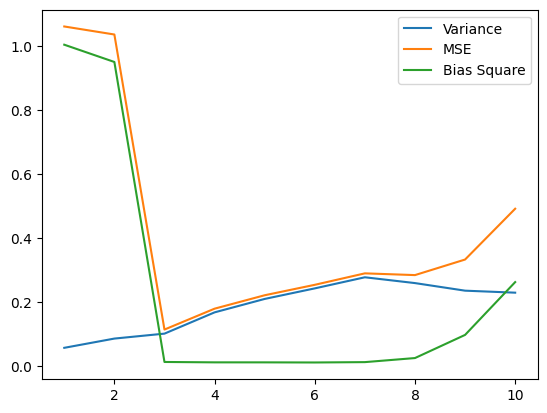

In [170]:
# 5

sns.lineplot(
    x=range(1, 11), y=map(lambda x: x["variance"], averages.values()), label="Variance"
)
sns.lineplot(x=range(1, 11), y=map(lambda x: x["mse"], averages.values()), label="MSE")
sns.lineplot(
    x=range(1, 11),
    y=map(lambda x: x["bias_square"], averages.values()),
    label="Bias Square",
)
plt.savefig("plot.png")
plt.show()